#### Уровень 1 (1)
Найти производную функции f(x) в точке

In [1]:
from sympy import diff, symbols, cos, sin, exp
import numpy as np

In [2]:
x,y,z = symbols('x y z')

In [3]:
#1 функция f(x) = sin(1/x)
diff(sin(1/x))

-cos(1/x)/x**2

In [4]:
#Производная в точке x0 = 5
print(round(-(cos(1/5)/(5**2)),4))

-0.0392


In [5]:
#2 функция f(x) = e^(-x/2)
diff(exp(-x/2))

-exp(-x/2)/2

In [6]:
#Производная в точке x0 = 2
print(round(-exp(-2/2)/2,4))

-0.1839


#### Уровень 1 (2)
Найти градиент функции в точке

In [7]:
#1 функция. Ищем частные производные

def func(x,y):
    return (x+y)**2 - 3*y + 5
#Производная по x
diff(func(x,y), x)

2*x + 2*y

In [8]:
#Производная по y
diff(func(x,y), y)

2*x + 2*y - 3

In [9]:
# Градиент в точке x0 = (2, 10):
print('grad_func = (',2*2 + 2*10,',', 2*2 + 2*10 - 3, ')')

grad_func = ( 24 , 21 )


In [10]:
#2 функция. Ищем частные производные

def function(x,y,z):
    return (x + y - z)**2 - 3*(y + z)**2

In [11]:
#Производная по x:
diff(function(x,y,z), x)

2*x + 2*y - 2*z

In [12]:
#Производная по y:
diff(function(x,y,z), y)

2*x - 4*y - 8*z

In [13]:
#Производная по z:
diff(function(x,y,z), z)

-2*x - 8*y - 4*z

In [14]:
# Градиент в точке x0 = (-1, -5, 0):
print('grad_function = (',2*(-1) + 2*(-5) - 2*0,',', 2*(-1) - 4*(-5) - 8*0, ',', -2*(-1) - 8*(-5) - 4*0 , ')')

grad_function = ( -12 , 18 , 42 )


#### Уровень 2
Используя градиентный спуск найти минимум функции с точностью до 10^(-8).
Подобрать learning rate, измерить кол-во итераций.
Проверить себя при помощи функции minimize в scipy.

$$ f(x, y)=(x-3)^2 + (y+5)^2,  x_0=(5,2) $$

In [15]:
def func(x,y):
    return (x-3)**2 + (y+5)**2
    
#Вычислим градиент функции
diff_x = diff(func(x,y),x) 
diff_y = diff(func(x,y),y)
print('grad_f = (', diff_x, ',', diff_y, ')')

grad_f = ( 2*x - 6 , 2*y + 10 )


In [27]:
#Задаем точку для 1ой итерации
x0 = np.array([10,10])

#Задаем вектор, по которому будем шагать (наш градиент)
def grad_f(x, y):
    grad_x = 2*x - 6
    grad_y = 2*y + 10
    return np.array([grad_x, grad_y])
    
#Точность поиска:
eps = 10e-8
#Размер шага
learning_rate = 0.1
#Кол-во итераций (шагов)
max_steps = 100

#Счётчик:
x_old = x0
i=0
while np.linalg.norm(grad_f(x_old[0], x_old[1])) > eps:
    #Обновляем точку X
    x_new = x_old - learning_rate * grad_f(x_old[0], x_old[1])
    x_old = x_new
    i += 1
    #Смотрим критерий останова
    if i == max_steps:
        break
print ('Точка минимума (наиболее приближенная к минимуму):', x_new)
print ('Значение функции в точке минимума:', func(x_new[0], x_new[1]))
print ('Минимум функции найден на шаге № :', i)
print ('Точность поиска составила:', eps)


Точка минимума (наиболее приближенная к минимуму): [ 3.00000002 -4.99999996]
Значение функции в точке минимума: 2.407621815595788e-15
Минимум функции найден на шаге № : 88
Точность поиска составила: 1e-07


In [31]:
# Проверка через scipy
from scipy.optimize import minimize

In [66]:
#Т.к. функция minimize оперирует только с массивом, то продублируем нашу функцию, задавая ей массив вместо x, y
def auto_min(vars):
    x,y = vars
    return (x-3)**2 + (y+5)**2

x0 = np.array([10,10])
minimize(auto_min, x0)
#Видим, что найденная точка градиентным спуском такая же = (3; -5)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.759326278313503e-12
        x: [ 3.000e+00 -5.000e+00]
      nit: 2
      jac: [-2.484e-06  3.592e-06]
 hess_inv: [[ 9.106e-01 -1.916e-01]
            [-1.916e-01  5.894e-01]]
     nfev: 12
     njev: 4

#### Уровень 3Построить график линий уровня для функции.

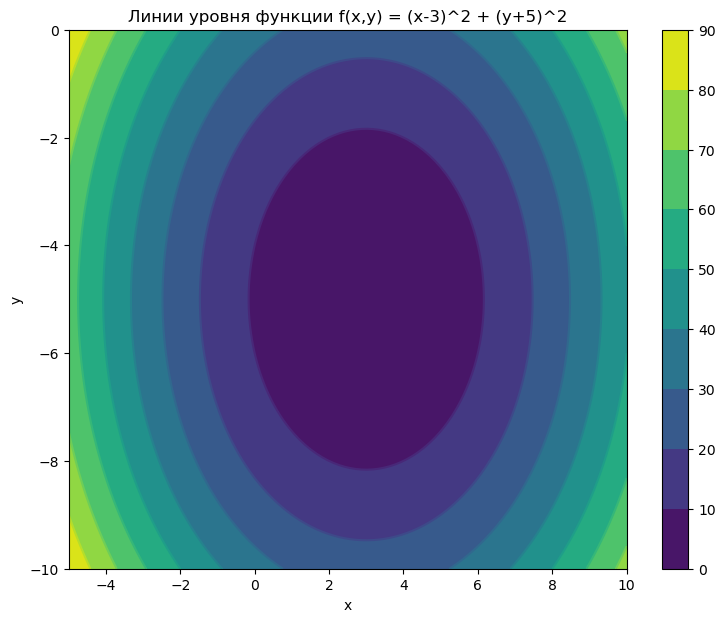

In [102]:
import matplotlib.pyplot as plt

#Задаем двумерную сетку значений
x = np.linspace(-5, 10, 100)
y = np.linspace(-10, 0, 100)
x, y = np.meshgrid(x, y)

#Вычисляем функцию для каждой точки
z = func(x, y)

#Создаем график линий уровня
plt.figure(figsize=(9,7))           #размер картинки
levels = np.linspace(0, 90, 10)     #частота изолиний

#Построение контуров
contour = plt.contour(x, y, z, levels = levels)

#Заполняем контуры
contourf = plt.contourf(x, y, z, levels = levels)

# Подписываем оси, добавляем легенду по цветам
plt.title('Линии уровня функции f(x,y) = (x-3)^2 + (y+5)^2')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contourf)

plt.show()